In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sys.path.append('..')
import deepomics

from deepomics import neuralnetwork as nn
from deepomics import utils, fit

/Users/eddy_lab/tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# load Frey faces dataset

In [2]:
fname = '../data/frey_rawface.mat'

from scipy.io import loadmat
matfile = loadmat(fname)
all_data = (matfile['ff'] / 255.).T
indices = np.arange(len(all_data))
np.random.shuffle(indices)

# split dataset into train and validation 
X_train = all_data[indices[:1500]]
X_valid = all_data[indices[1500:]]

# place data as a dictionary
train = {'inputs': X_train, 'targets': X_train}
valid = {'inputs': X_valid, 'targets': X_valid}

width = 20
height = 28
input_shape = [None, width*height]
output_shape = [None, width*height]

In [11]:
def model(input_shape, output_shape):

    # create model
    layer1 = {'layer': 'input', #41
            'input_shape': input_shape
            }
    layer2 = {'layer': 'dense',
            'num_units': 128,
            'activation': 'relu',
            #'dropout': 0.1,
            }
    layer3 = {'layer': 'variational_normal',
            'num_units': 30,
            'name': 'Z',
            }
    layer4 = {'layer': 'dense',
            'num_units': 128,
            'activation': 'relu',
            #'dropout': 0.1,
            }
    layer5 = {'layer': 'variational_normal',
            'num_units': output_shape[1],
            'activation': 'sigmoid',
            'name': 'X'
             }
    
    #from tfomics import build_network
    model_layers = [layer1, layer2, layer3, layer4, layer5]

    # optimization parameters
    optimization = {"objective": "elbo_gaussian_gaussian",
                  "optimizer": "adam",
                  "learning_rate": 0.0003,
                  "beta1": 0.9, 
                  #"l2": 1e-6,
                  }
    return model_layers, optimization


# get model info
model_layers, optimization = model(input_shape, output_shape)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=False)
nnmodel.inspect_layers()

# compile neural trainer
model_save_path = os.path.join('../results', 'frey')
nntrainer = nn.NeuralTrainer(nnmodel, save=None, file_path=model_save_path)

----------------------------------------------------------------------------
Network architecture:
----------------------------------------------------------------------------
layer1: inputs
(?, 560)
layer2: dense_0
(?, 128)
layer3: dense_0_bias
(?, 128)
layer4: dense_0_active
(?, 128)
layer5: Z_mu
(?, 30)
layer6: Z_logvar
(?, 30)
layer7: Z_sample
(?, 30)
layer8: dense_1
(?, 128)
layer9: dense_1_bias
(?, 128)
layer10: dense_1_active
(?, 128)
layer11: X_mu
(?, 560)
layer12: X_logvar
(?, 560)
layer13: X_sample
(?, 560)
layer14: X
(?, 560)
----------------------------------------------------------------------------


# Start the session

In [12]:
# initialize session
sess = utils.initialize_session()

# Train the model with KL-weight annealing  (Starts from an autoencoder and becomes a fully VAE model over time)

In [13]:
data = {'train': train, 'valid': valid}
fit.train_minibatch(sess, nntrainer, data, batch_size=128,
                    num_epochs=500, patience=20, verbose=1, shuffle=True)

Epoch 1 out of 500 
  valid loss:		375.91208
Epoch 2 out of 500 
  valid loss:		27.83841
Epoch 3 out of 500 
  valid loss:		-277.19995
Epoch 4 out of 500 
  valid loss:		-433.44299
Epoch 5 out of 500 
  valid loss:		-483.66579
Epoch 6 out of 500 
  valid loss:		-505.44743
Epoch 7 out of 500 
  valid loss:		-519.14983
Epoch 8 out of 500 
  valid loss:		-524.86079
Epoch 9 out of 500 
  valid loss:		-536.63145
Epoch 10 out of 500 
  valid loss:		-543.71065
Epoch 11 out of 500 
  valid loss:		-550.98056
Epoch 12 out of 500 
  valid loss:		-562.82780
Epoch 13 out of 500 
  valid loss:		-574.33925
Epoch 14 out of 500 
  valid loss:		-590.64011
Epoch 15 out of 500 
  valid loss:		-609.54535
Epoch 16 out of 500 
  valid loss:		-626.71114
Epoch 17 out of 500 
  valid loss:		-642.95280
Epoch 18 out of 500 
  valid loss:		-666.94781
Epoch 19 out of 500 
  valid loss:		-678.74428
Epoch 20 out of 500 
  valid loss:		-692.97023
Epoch 21 out of 500 
  valid loss:		-705.04791
Epoch 22 out of 500 
  va

  valid loss:		-1040.32741
Epoch 175 out of 500 
  valid loss:		-1047.14151
Epoch 176 out of 500 
  valid loss:		-1054.34360
Epoch 177 out of 500 
  valid loss:		-1051.44205
Epoch 178 out of 500 
  valid loss:		-1058.19357
Epoch 179 out of 500 
  valid loss:		-1053.18878
Epoch 180 out of 500 
  valid loss:		-1053.01129
Epoch 181 out of 500 
  valid loss:		-1056.63647
Epoch 182 out of 500 
  valid loss:		-1054.50006
Epoch 183 out of 500 
  valid loss:		-1053.62714
Epoch 184 out of 500 
  valid loss:		-1057.04407
Epoch 185 out of 500 
  valid loss:		-1046.51117
Epoch 186 out of 500 
  valid loss:		-1062.35672
Epoch 187 out of 500 
  valid loss:		-1051.63449
Epoch 188 out of 500 
  valid loss:		-1060.31683
Epoch 189 out of 500 
  valid loss:		-1060.38242
Epoch 190 out of 500 
  valid loss:		-1061.41132
Epoch 191 out of 500 
  valid loss:		-1062.77036
Epoch 192 out of 500 
  valid loss:		-1059.78027
Epoch 193 out of 500 
  valid loss:		-1059.90588
Epoch 194 out of 500 
  valid loss:		-1060

  valid loss:		-1110.00381
Epoch 343 out of 500 
  valid loss:		-1118.99915
Epoch 344 out of 500 
  valid loss:		-1116.20786
Epoch 345 out of 500 
  valid loss:		-1110.71481
Epoch 346 out of 500 
  valid loss:		-1116.24625
Epoch 347 out of 500 
  valid loss:		-1117.76364
Epoch 348 out of 500 
  valid loss:		-1122.14542
Epoch 349 out of 500 
  valid loss:		-1120.99207
Epoch 350 out of 500 
  valid loss:		-1120.24994
Epoch 351 out of 500 
  valid loss:		-1114.99713
Epoch 352 out of 500 
  valid loss:		-1121.65222
Epoch 353 out of 500 
  valid loss:		-1115.87451
Epoch 354 out of 500 
  valid loss:		-1112.43478
Epoch 355 out of 500 
  valid loss:		-1120.18771
Epoch 356 out of 500 
  valid loss:		-1118.41882
Epoch 357 out of 500 
  valid loss:		-1118.64825
Epoch 358 out of 500 
  valid loss:		-1124.32092
Epoch 359 out of 500 
  valid loss:		-1123.11398
Epoch 360 out of 500 
  valid loss:		-1120.43994
Epoch 361 out of 500 
  valid loss:		-1114.48819
Epoch 362 out of 500 
  valid loss:		-1121

# Visualize samples about the latent space mapped by the original image

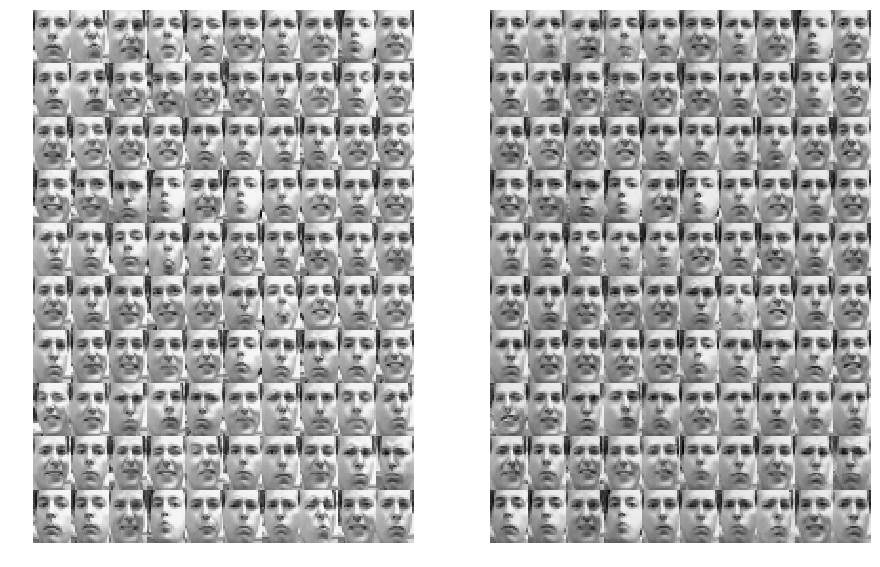

In [14]:
# randomly select a set number of training samples
num_grid = 10
shuffle = np.random.permutation(X_train.shape[0])
X_data = X_train[shuffle[:num_grid*num_grid]]

# get the generated images about the latent space where the training samples mapped to
samples = nntrainer.get_activations(sess, {'inputs': X_data}, layer='X')

# plot training samples and generated trainingsamples
fig = plt.figure()
ax = plt.subplot(1,2,1);
ax.imshow((X_data.reshape(num_grid, num_grid, 28, 20)
                   .transpose(0, 2, 1, 3)
                   .reshape(num_grid*28, num_grid*20)), cmap='gray')
ax.axis('off')
ax = plt.subplot(1,2,2);
ax.imshow((samples.reshape(num_grid, num_grid, 28, 20)
                   .transpose(0, 2, 1, 3)
                   .reshape(num_grid*28, num_grid*20)), cmap='gray')
ax.axis('off')
fig.set_size_inches(15,15)

# visualize the latent space learned by the VAE

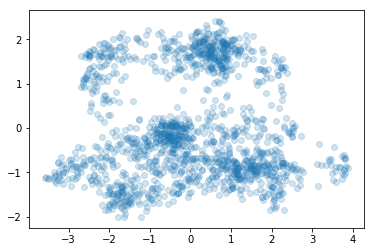

In [15]:
# extract latent space for training data
Z = nntrainer.get_activations(sess, {'inputs': X_train}, layer='Z_mu')

# perform PCA on latent space
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z_reduce = pca.fit_transform(Z)

# plot reduced latent space
fig = plt.figure()
plt.scatter(Z_reduce[:,0], Z_reduce[:,1], alpha=0.2)